#### Audio Classification Data Preprocessing

In [9]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='temp/UrbanSound8K/audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [10]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


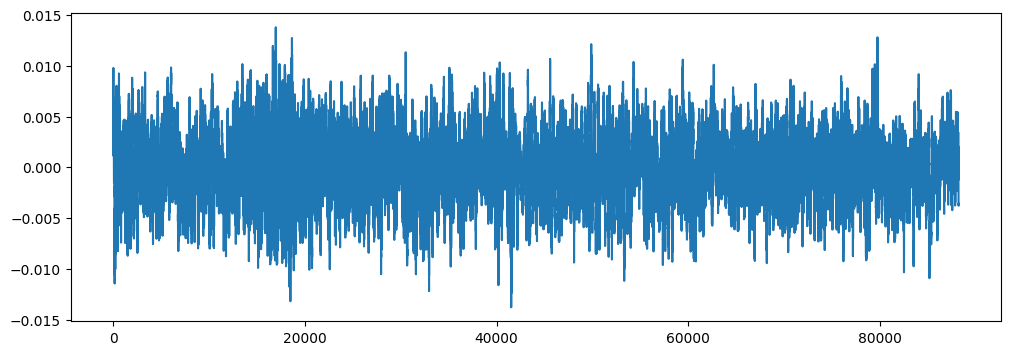

In [11]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will be 1

In [12]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [13]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

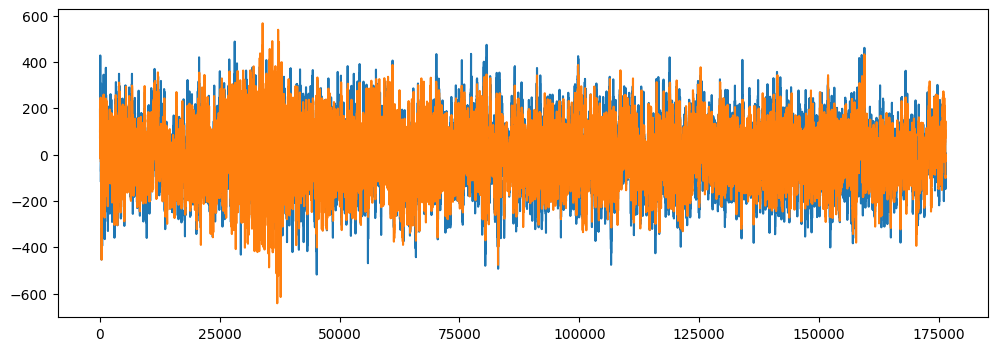

In [14]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [16]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125225e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682457e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-2.8760443e+00, -3.2479770e+00, -4.8965530e+00, ...,
        -5.2023613e-01,  3.5672503e+00,  7.4937558e+00],
       [-4.2968309e-01, -5.8838886e-01, -8.1724268e-01, ...,
         1.8340763e-01,  7.6732612e-01,  2.7120004e+00],
       [-1.1780636e+00,  6.9809580e-01,  6.3521614e+00, ...,
        -2.6221936e+00, -4.7912698e+00, -3.1826305e+00]], dtype=float32)

In [17]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='temp/UrbanSound8K/audio/'
metadata=pd.read_csv('temp/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [19]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
# TOOK 11 minutes to iterate through all 8,732 it[erations] i.e. files

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:33, 15.23it/s]


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [21]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [22]:
X.shape

(8732, 40)

In [23]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [24]:

### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [25]:
y.shape

(8732, 10)

In [26]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181764e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651115e+00]], dtype=float32)

In [28]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
X_train.shape

(6985, 40)

In [30]:
X_test.shape

(1747, 40)

In [31]:
y_train.shape

(6985, 10)

In [32]:
y_test.shape

(1747, 10)

### Model Creation

In [33]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [36]:
### No of classes
num_labels=y.shape[1]

In [37]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,))) # input size is 40 because X_train.shape is (6985, 40)
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

c:\Users\hi\Desktop\projects\python_projects\ai_projects\tutorial\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 10 # TODO make it 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1128 - loss: 19.1792 
Epoch 1: val_loss improved from inf to 2.28489, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1133 - loss: 18.6597 - val_accuracy: 0.1231 - val_loss: 2.2849
Epoch 2/10
202/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1156 - loss: 2.7145  
Epoch 2: val_loss improved from 2.28489 to 2.27064, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1161 - loss: 2.7021 - val_accuracy: 0.1259 - val_loss: 2.2706
Epoch 3/10
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1312 - loss: 2.3411 
Epoch 3: val_loss improved from 2.27064 to 2.17591, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1313 - loss: 2.3406 - val_accuracy: 0.1425 - val_loss: 2.1759
Epoch 4/10
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

Epoch 29/100
218/219 [============================>.] - ETA: 0s - loss: 0.8908 - accuracy: 0.7041
Epoch 00029: val_loss improved from 0.69494 to 0.69312, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8907 - accuracy: 0.7041 - val_loss: 0.6931 - val_accuracy: 0.7876
Epoch 30/100
214/219 [============================>.] - ETA: 0s - loss: 0.8982 - accuracy: 0.7052
Epoch 00030: val_loss did not improve from 0.69312
219/219 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.7044 - val_loss: 0.7249 - val_accuracy: 0.7785
Epoch 31/100
219/219 [==============================] - ETA: 0s - loss: 0.9161 - accuracy: 0.7031
Epoch 00031: val_loss did not improve from 0.69312
219/219 [==============================] - 0s 2ms/step - loss: 0.9161 - accuracy: 0.7031 - val_loss: 0.7158 - val_accuracy: 0.7768
Epoch 32/100
214/219 [============================>.] - ETA: 0s - loss: 0.8970 - accuracy: 0.7059
Ep

Epoch 57/100
205/219 [===========================>..] - ETA: 0s - loss: 0.8725 - accuracy: 0.7096
Epoch 00057: val_loss did not improve from 0.67392
219/219 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.7101 - val_loss: 0.6869 - val_accuracy: 0.7876
Epoch 58/100
193/219 [=========================>....] - ETA: 0s - loss: 0.8705 - accuracy: 0.7173
Epoch 00058: val_loss did not improve from 0.67392
219/219 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.7151 - val_loss: 0.7031 - val_accuracy: 0.7911
Epoch 59/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8672 - accuracy: 0.7156
Epoch 00059: val_loss did not improve from 0.67392
219/219 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.7127 - val_loss: 0.6786 - val_accuracy: 0.8002
Epoch 60/100
219/219 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.7141
Epoch 00060: val_loss improved from 0.67392 to 0.65939, saving

203/219 [==========================>...] - ETA: 0s - loss: 0.8359 - accuracy: 0.7252
Epoch 00086: val_loss did not improve from 0.65939
219/219 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.7236 - val_loss: 0.6748 - val_accuracy: 0.7956
Epoch 87/100
214/219 [============================>.] - ETA: 0s - loss: 0.8324 - accuracy: 0.7315
Epoch 00087: val_loss improved from 0.65939 to 0.65424, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8335 - accuracy: 0.7309 - val_loss: 0.6542 - val_accuracy: 0.7951
Epoch 88/100
218/219 [============================>.] - ETA: 0s - loss: 0.8183 - accuracy: 0.7261
Epoch 00088: val_loss did not improve from 0.65424
219/219 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.7260 - val_loss: 0.6593 - val_accuracy: 0.7951
Epoch 89/100
212/219 [============================>.] - ETA: 0s - loss: 0.8595 - accuracy: 0.7152
Epoch 00089: va

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.3669147193431854


In [42]:
filename="dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
# model.predict_classes(prediction_feature)
predictions = np.argmax(model.predict(prediction_feature),axis=1)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([2])

In [43]:
import pandas as pd

metadata=pd.read_csv('temp/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [44]:
prediction_feature.shape

(1, 40)

In [45]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339075  ,    7.6736345 ,  -29.16449   ,  -18.950254  ,
         -2.9579992 ,   -8.16233   ,  -15.153101  ,   -6.6048055 ,
         -7.5685973 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.9842806 ,  -16.414577  ,
        -10.0286455 ,   13.009956  ,    0.53346074,  -23.84339   ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832011 ,
         -1.2624055 ,   17.700018  ,   13.847463  ,   -5.186282  ],
      dtype=float32)

In [46]:
# model.predict_classes(X_test)
predictions = np.argmax(model.predict(X_test),axis=1)
predictions

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0, 3, 7, ..., 2, 2, 2])

In [54]:
import librosa
import numpy as np

filename = "drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Use predict() and then np.argmax()
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=1)

print(predicted_label)

# Convert numeric label to class name using LabelEncoder
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(f"prediction_class={prediction_class}")

### Lets hear the sound
import IPython.display as ipd
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
ipd.Audio(filename)


[-109.16258      57.936382    -33.042652     14.372897    -31.767443
    3.1929638   -23.526052      6.8902907   -29.522177     -0.21237417
  -14.281208     12.023946    -14.65325       8.357844     -8.04855
    7.023628     -9.606827      8.186663     -6.144024      7.6158285
   -5.2255664     5.3874435   -10.293876      0.24498124   -9.680899
    5.220994     -5.4389186     5.1786876    -3.596545      3.0935206
   -6.738543      3.9138331    -3.2425        4.8166914    -5.2739935
    2.2355769    -3.7051177     0.4789529    -3.9747596    -1.2134575 ]
[[-109.16258      57.936382    -33.042652     14.372897    -31.767443
     3.1929638   -23.526052      6.8902907   -29.522177     -0.21237417
   -14.281208     12.023946    -14.65325       8.357844     -8.04855
     7.023628     -9.606827      8.186663     -6.144024      7.6158285
    -5.2255664     5.3874435   -10.293876      0.24498124   -9.680899
     5.220994     -5.4389186     5.1786876    -3.596545      3.0935206
    -6.738543     

<Figure size 1400x500 with 0 Axes>